Imports:

In [135]:
import copy

%matplotlib notebook
import numpy as np
np.set_printoptions(precision=2)
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import lognorm, gmean

In [115]:
price = 1
sigma = 0.8
calc_lim = 6
step_size = 0.001
x = np.arange(np.max([price-price*calc_lim*sigma,0]),price+price*calc_lim*sigma,step_size)

<IPython.core.display.Javascript object>


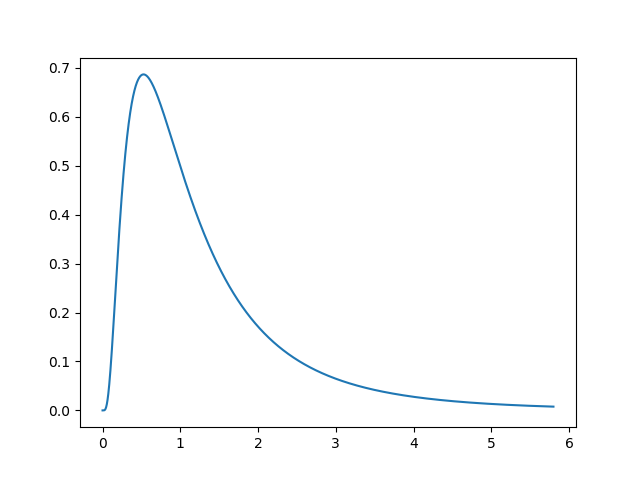

In [116]:
mu = np.log(price)
y = lognorm.pdf(x, s=sigma, scale=price,loc=0)
plt.figure()
plt.plot(x,y)

In [117]:
return_mean = (np.exp(mu+sigma**2/2)-price)/price
print(return_mean)

0.377127764336


In [111]:
return_xy = (np.sum(x*y)*step_size - price)/price
print('For high sigma and low calc_lim values this can be significantly smaller than return_mean:')
print(return_xy)

For high sigma and low calc_lim values this can be significantly smaller than return_mean:
0.265384686783


Cholesky-decompose for generating Correlated Variables

Correlation: 0.392442784417
s_0: 0.102224769921
s_1: 0.248445396041


<IPython.core.display.Javascript object>


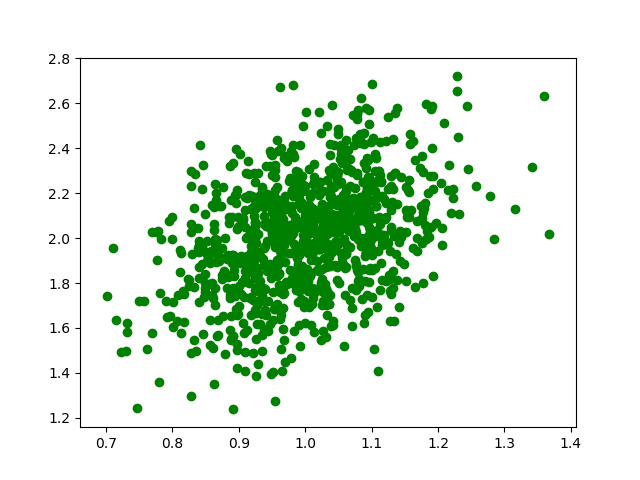

In [79]:
#np.random.seed(1)

num_samples = 1000
num_variables = 2
sigma_1 = 0.1
sigma_2 = 0.25
cor_12 = 0.4
cov_12 = cor_12 * sigma_1 * sigma_2
cov = [[sigma_1**2, cov_12], [cov_12, sigma_2**2]]

L = np.linalg.cholesky(cov)
# print(L.shape)
# (2, 2)
uncorrelated = np.random.standard_normal((num_variables, num_samples))
mean = [1, 2]
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(2, 1)
(cor,_) = stats.pearsonr(correlated[0,:],correlated[1,:] )
# print(correlated.shape)
# (2, 1000)
print('Correlation: '+str(cor))
print('s_0: '+str(np.std(correlated[0,:])))
print('s_1: '+str(np.std(correlated[1,:])))
plt.figure()
plt.scatter(correlated[0, :], correlated[1, :], c='green')


In [67]:
#DATA
num_samples = 1000
num_variables = 4
sigma_0 = 0.1
sigma_1 = 0.1
sigma_2 = 0.1
sigma_3 = 0.1
cor_01 = -0.75
cor_02 = -0.75
cor_03 = 0
cor_12 = 0.5
cor_13 = 0
cor_23 = 0

s_0: 0.0992
s_1: 0.1003
s_2: 0.0968
s_3: 0.0975
Correlation_01 : -0.7444
Correlation_02 : -0.7256
Correlation_03 : 0.0064
Correlation_12 : 0.4842
Correlation_13 : -0.0314
Correlation_23 : -0.0110


<IPython.core.display.Javascript object>


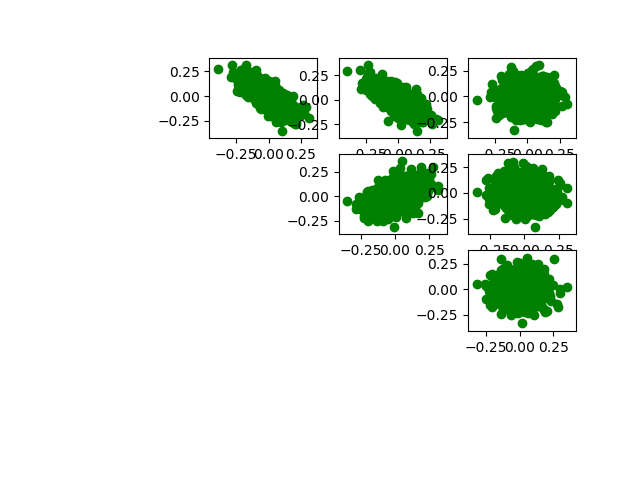

In [68]:
#np.random.seed(1)
# CALCULATION
cov_01 = cor_01 * sigma_0 * sigma_1
cov_02 = cor_02 * sigma_0 * sigma_2
cov_03 = cor_03 * sigma_0 * sigma_3
cov_12 = cor_12 * sigma_1 * sigma_2
cov_13 = cor_13 * sigma_1 * sigma_3
cov_23 = cor_23 * sigma_2 * sigma_3
cov = [[sigma_0**2, cov_01, cov_02, cov_03],
       [cov_01, sigma_1**2, cov_12, cov_13],
       [cov_02, cov_12, sigma_2**2, cov_23],
       [cov_03, cov_13, cov_23, sigma_3**2]]

L = np.linalg.cholesky(cov)

uncorrelated = np.random.standard_normal((num_variables, num_samples))
mean = [0,0,0,0]
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(num_variables, 1)
(cors_01,_) = stats.pearsonr(correlated[0,:],correlated[1,:] )
(cors_02,_) = stats.pearsonr(correlated[0,:],correlated[2,:] )
(cors_03,_) = stats.pearsonr(correlated[0,:],correlated[3,:] )
(cors_12,_) = stats.pearsonr(correlated[1,:],correlated[2,:] )
(cors_13,_) = stats.pearsonr(correlated[1,:],correlated[3,:] )
(cors_23,_) = stats.pearsonr(correlated[2,:],correlated[3,:] )

print('s_0: {:.4f}'.format(np.std(correlated[0,:])))
print('s_1: {:.4f}'.format(np.std(correlated[1,:])))
print('s_2: {:.4f}'.format(np.std(correlated[2,:])))
print('s_3: {:.4f}'.format(np.std(correlated[3,:])))
print('Correlation_01 : {:.4f}'.format(cors_01))
print('Correlation_02 : {:.4f}'.format(cors_02))
print('Correlation_03 : {:.4f}'.format(cors_03))
print('Correlation_12 : {:.4f}'.format(cors_12))
print('Correlation_13 : {:.4f}'.format(cors_13))
print('Correlation_23 : {:.4f}'.format(cors_23))


plt.figure()
plt.subplot(4,4,2)
plt.scatter(correlated[0, :], correlated[1, :], c='green')
plt.subplot(4,4,3)
plt.scatter(correlated[0, :], correlated[2, :], c='green')
plt.subplot(4,4,4)
plt.scatter(correlated[0, :], correlated[3, :], c='green')
plt.subplot(4,4,7)
plt.scatter(correlated[1, :], correlated[2, :], c='green')
plt.subplot(4,4,8)
plt.scatter(correlated[1, :], correlated[3, :], c='green')
plt.subplot(4,4,12)
plt.scatter(correlated[2, :], correlated[3, :], c='green')

In [212]:
def simulate_portfolio(sigma,weight,cor,timesteps,r=0):
    cov = copy.copy(cor)
    for i in range(0,len(sigma)): cov[i,:] = cov[i,:]*sigma[i]
    for j in range(0,len(sigma)): cov[:,j] = cov[:,j]*sigma[j]
    for ii in range(0,len(sigma)): cov[ii,ii] = sigma[ii]**2


    L = np.linalg.cholesky(cov)

    uncorrelated = np.random.standard_normal((cov.shape[0], timesteps))
    mean = r - sigma**2/2
    correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(cov.shape[0], 1)

    cor_res = np.ones(cov.shape)
    for i in range(0,cor_res.shape[0]):
        for j in range(0, cor_res.shape[1]):
            cor_res[i,j] = stats.pearsonr(correlated[i,:],correlated[j,:])[0]

    returns = (np.exp(correlated)*weight).sum(axis=0)        
    return returns, cor_res


Generative Correlation Matrix:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Return: 0.07

STD: 0.12

Result Correlation Matrix:
[[ 1.   -0.01  0.04 -0.08]
 [-0.01  1.    0.02 -0.05]
 [ 0.04  0.02  1.   -0.01]
 [-0.08 -0.05 -0.01  1.  ]]


<IPython.core.display.Javascript object>


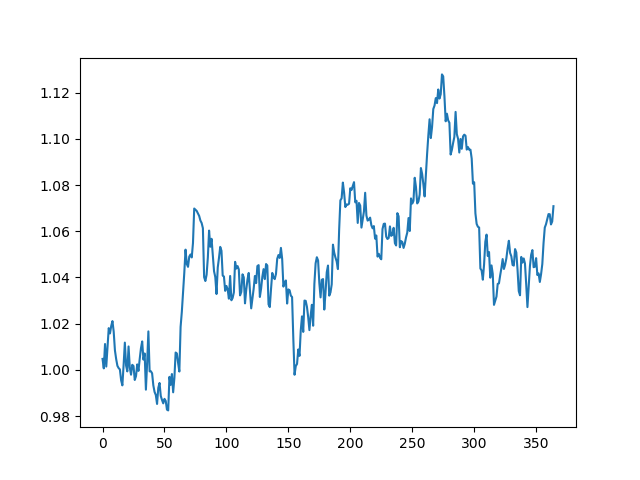

In [178]:
timesteps = 365
sigma = np.array([0.25,0.25,0.25,0.25])*np.sqrt(1/timesteps)
weight = np.array([[0.25,0.25,0.25,0.25]]).transpose()
cor = np.array(
    [[1,      0,      0,      0 ],
     [np.nan, 1,      0,      0 ],
     [np.nan, np.nan, 1,      0 ],
     [np.nan, np.nan, np.nan, 1]])
cor[np.tril_indices(cor.shape[0])] = cor.transpose()[np.tril_indices(cor.shape[0])]


returns, cor_res= simulate_portfolio(sigma, weight, cor, timesteps)

print('\nGenerative Correlation Matrix:')
print(cor)
print('\nReturn: {:.2f}'.format(returns.prod()-1))
print('\nSTD: {:.2f}'.format(np.std(returns)/np.sqrt(1/timesteps)))

print('\nResult Correlation Matrix:')
print(cor_res)

plt.figure()
plt.plot((returns).cumprod())


Generative Correlation Matrix:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Mean Return: 0.02

Mean STD: 0.40


<IPython.core.display.Javascript object>


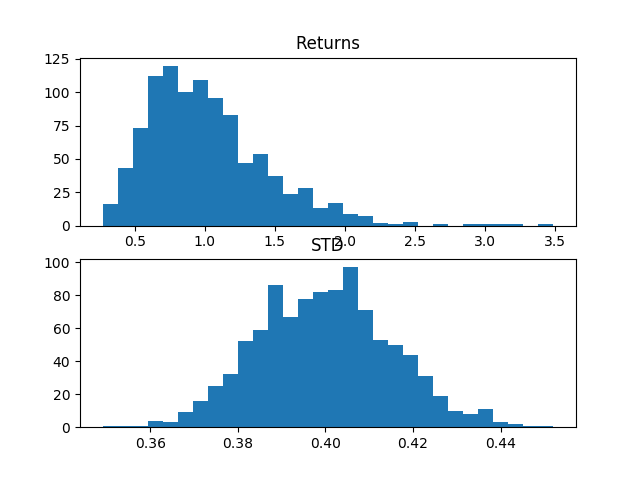

In [220]:
super_samples = 1000
timesteps = 365
r=0

sigma = np.array(
    [0.8,0.8,0.8,0.8])*np.sqrt(1/timesteps)
weight = np.array(
    [[0.25,0.25,0.25,0.25]]).transpose()
cor = np.array(
    [[1,      0,      0,      0 ],
     [np.nan, 1,      0,      0 ],
     [np.nan, np.nan, 1,      0 ],
     [np.nan, np.nan, np.nan, 1]])

cor[np.tril_indices(cor.shape[0])] = cor.transpose()[np.tril_indices(cor.shape[0])]

multi_ret = np.zeros((super_samples,1))
multi_std = np.zeros((super_samples,1))
for i in range(0,len(multi_ret)):
    (returns, _) = simulate_portfolio(sigma, weight, cor, timesteps, r)
    multi_ret[i] = (returns).prod()
    multi_std[i] = np.std(returns)/np.sqrt(1/365)

print('\nGenerative Correlation Matrix:')
print(cor)
print('\nMean Return: {:.2f}'.format(np.mean(multi_ret)-1))
print('\nMean STD: {:.2f}'.format(np.mean(multi_std)))

plt.figure()
plt.subplot(2,1,1)
plt.hist(multi_ret,bins=30)
plt.title('Returns')
plt.subplot(2,1,2)
plt.hist(multi_std,bins=30)
plt.title('STD')



Mean Return: -0.00
Theo. Return: 0.00

Mean STD: 0.80


<IPython.core.display.Javascript object>


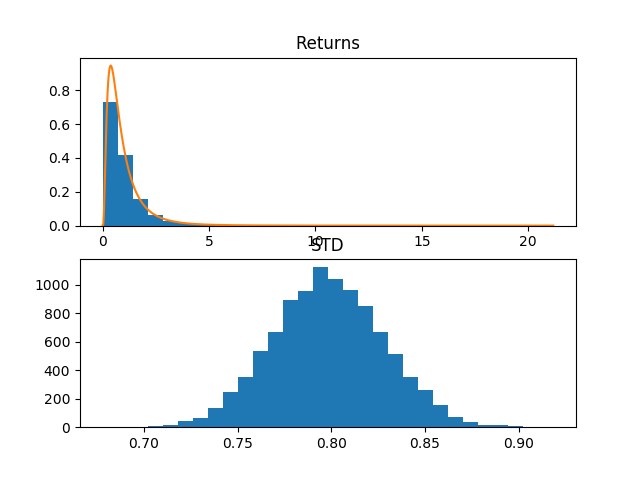

In [219]:
super_samples = 10000
time_steps = 365
r = 0

sigma_year = 0.8
sigma = sigma_year * np.sqrt(1/time_steps)

multi_ret = np.zeros((super_samples,1))
multi_std = np.zeros((super_samples,1))
for i in range(0,len(multi_ret)):
    returns = np.exp(np.random.normal(loc=(r-sigma**2/2),scale=sigma,size=(time_steps,1)))
    multi_ret[i] = (returns).prod()
    multi_std[i] = np.std(returns)/np.sqrt(1/time_steps)
    

lognorm_x = np.arange(0,np.max(multi_ret) , 0.01)
lognorm_y = lognorm.pdf(lognorm_x, s=sigma_year, scale=np.exp(r-sigma_year**2/2),loc=0)
theoretical_return = (np.exp((r-sigma_year**2/2)+sigma_year**2/2)-1)/1

print('\nMean Return: {:.2f}'.format(np.mean(multi_ret)-1))
print('Theo. Return: {:.2f}'.format(theoretical_return))
print('\nMean STD: {:.2f}'.format(np.mean(multi_std)))
plt.figure()
plt.subplot(2,1,1)
plt.hist(multi_ret,bins=30, normed=True)
plt.plot(lognorm_x,lognorm_y)
plt.title('Returns')
plt.subplot(2,1,2)
plt.hist(multi_std,bins=30)
plt.title('STD')